<a href="https://www.kaggle.com/code/janmartins/sentiment-analysis-lr-rf-dt-knn-xgb?scriptVersionId=221830910" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importando as bibliotecas que vamos usar e retirando os avisos (construção de gráficos)
import numpy as np
import pandas as pd
import seaborn as sns
import re
import unicodedata
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv


In [3]:
df=pd.read_csv("/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv")

In [4]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
# Como a coluna statement tem valores nulos, vamos tratá-los aqui
# Podemos preencher os valores NaN com uma string vazia ou remover os valores

"""Caso queira manter as linhas e preencher os valores com uma string vazia:
df['statement'] = df['statement'].fillna('')"""

df = df.dropna(subset=['statement'])

In [7]:
# Como a coluna Unnmaed possue apenas valores dos indices, podemos removê-la

df = df.drop(columns=['Unnamed: 0'], axis=1)

In [8]:
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()

    # Remover acentos (normalização Unicode)
    text = unicodedata.normalize('NFD', text)  # Normaliza para decompor caracteres acentuados
    text = ''.join([c for c in text if unicodedata.category(c) != 'Mn'])  # Remove os acentos
    
    # Remover caracteres especiais, números e pontuações
    text = re.sub(r'[^a-z\s]', '', text)
    
    return text

In [9]:
# Aplicar o pré-processamento em cada texto na coluna 'statement'
df['statement'] = df['statement'].apply(preprocess_text)

In [10]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,trouble sleeping confused mind restless heart ...,Anxiety
2,all wrong back off dear forward doubt stay in ...,Anxiety
3,ive shifted my focus to something else but im ...,Anxiety
4,im restless and restless its been a month now ...,Anxiety


# Analise Exploratória dos Dados

In [11]:
sns.set_style("whitegrid")

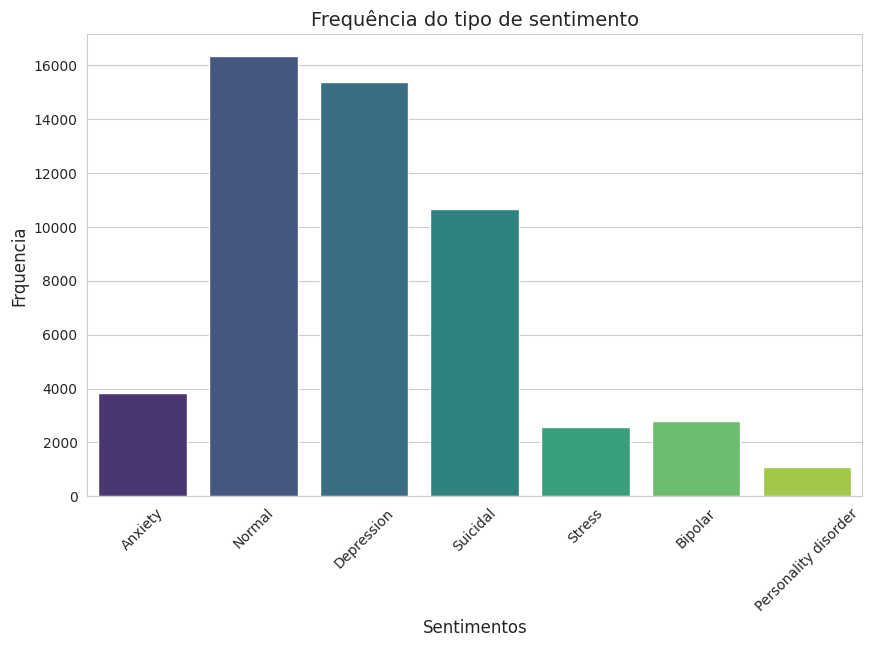

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status', palette='viridis')
plt.title('Frequência do tipo de sentimento', fontsize=14)
plt.xlabel('Sentimentos', fontsize=12)
plt.ylabel('Frquencia', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# ML

In [13]:
# Bibliotecas que vamos usar para o nosso aprendizado

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [14]:
label_encoder = LabelEncoder()

df['status'] = label_encoder.fit_transform(df['status'])

In [15]:
# Divida os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(df['statement'], df['status'], test_size=0.2, random_state=42)

In [16]:
# Inicialize o TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Ajuste e transforme os dados de treino e teste
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [17]:
# Inicialize os modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

# Treine os modelos e avalie-os
results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'classification_report': classification_rep, 'confusion_matrix': confusion_mat}


In [18]:
# Imprimir os resultados de cada modelo
for name, result in results.items():
    print(f"Modelo: {name}")
    print(f"Acurácia: {result['accuracy']}")
    print(f"Relatório de Classificação:\n{result['classification_report']}")
    print(f"Matriz de Confusão:\n{result['confusion_matrix']}")
    print("-" * 50)

Modelo: Logistic Regression
Acurácia: 0.7663471576350005
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       755
           1       0.84      0.74      0.79       527
           2       0.71      0.73      0.72      3016
           3       0.84      0.95      0.89      3308
           4       0.84      0.46      0.60       237
           5       0.72      0.48      0.58       536
           6       0.68      0.65      0.67      2158

    accuracy                           0.77     10537
   macro avg       0.78      0.68      0.72     10537
weighted avg       0.76      0.77      0.76     10537

Matriz de Confusão:
[[ 589   13   44   76    5   21    7]
 [  11  392   63   32    4   10   15]
 [  35   29 2198  187    4   18  545]
 [  14    8   81 3130    3   27   45]
 [   5    6   64   25  110   19    8]
 [  48   14   89   96    5  256   28]
 [   2    6  571  176    0    3 1400]]
-------------------------------